In [1]:
import os
import requests

In [27]:
def download_image_from_url(image_url: str, save_path: str, timeout: int = 10) -> bool:
    """
    Downloads an image from the given URL.
    Prints an error message if the image does not exist (404 error)
    or if the download does not complete within the specified timeout.
    Returns True if the download is successful, False otherwise.

    Args:
        image_url (str): The URL of the image to download.
        save_path (str): The local path where the image will be saved,
                         including the filename and extension.
        timeout (int): The download timeout in seconds. If the download
                       exceeds this time, an error will be raised.
    """
    # --- ADDED HEADERS HERE ---
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
        'Accept': 'image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.9',
        'Connection': 'keep-alive',
    }
    # --- END ADDED HEADERS ---

    try:
        response = requests.get(image_url, stream=True, timeout=timeout, headers=headers) # Pass headers here
        
        # Raise an HTTPError for bad responses (4xx or 5xx status codes).
        response.raise_for_status() 

        os.makedirs(os.path.dirname(save_path), exist_ok=True)

        with open(save_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Image successfully downloaded to: {save_path}")
        return True  # Return True if the image is successfully downloaded

    except requests.exceptions.HTTPError as e:
        # Handle HTTP errors, specifically checking for 404 Not Found.
        if e.response.status_code == 403: # Specifically check for 403
            print(f"Error: Access forbidden (403 Forbidden) - {image_url}. This might be due to website security measures. Try using appropriate User-Agent and Referer headers.")
        elif e.response.status_code == 404:
            print(f"Error: Image not found or invalid URL (404 Not Found) - {image_url}")
        else:
            print(f"An HTTP error occurred during download (Status Code: {e.response.status_code}): {e}")
    except requests.exceptions.ConnectionError as e:
        # Handle network connection errors.
        print(f"Error: Could not connect to the server. Please check your network connection or URL - {e}")
    except requests.exceptions.Timeout as e:
        # Handle download timeout errors.
        print(f"Error: Download timed out. Exceeded {timeout} seconds - {e}")
    except requests.exceptions.RequestException as e:
        # Handle any other requests-related errors.
        print(f"An unknown error occurred during download: {e}")
    except Exception as e:
        # Handle any other unexpected errors.
        print(f"An unexpected error occurred: {e}")
    
    return False  # Return False if the download fails

In [29]:
image_url = "https://www.henryusa.com/wp-content/uploads/2022/07/Kalel_buttstock2-480x407.jpg"
save_path = "./tmp/test2.jpg"

flag = download_image_from_url(image_url=image_url, 
                                save_path=save_path, 
                                timeout=10)

Image successfully downloaded to: ./tmp/test2.jpg


In [16]:
import json

with open("/fs/archive/share/mm_datasets/obelics_processed.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)  # Parse the JSON line into a dictionary
        print(json.dumps(data, indent=4))
        print(data["images"])

{
    "text": "<|image|>The buyer would get everything, including Lambo's headquarters.\n\nThe investment groupQuantum Group AG has submitted a\u20ac7.5 billion ($9.2 billion at current exchange rates) offer to purchase Lamborghini from Volkswagen Group, Autocar reports. There's no info yet about whether VW intends to accept the offer or further negotiate the deal.\n\nQuantum Group is a holding company based in Zurich, Switzerland, and it might have a tangential relationship with the Porsche family.Rea Stark is representing Quantum in the Lamborghini purchase offer. He is also a co-founder of Pi\u00ebchAutomotive along with Anton Pi\u00ebch who is the son of former VW Group boss Ferdinand Pi\u00ebch and the great-grandson of Ferdinand Porsche. Although, it's not clear if Anton Pi\u00ebch has any role in this attempt to buy Lamborghini, according to Autocar.\n\nQuantum Group wants to purchase more than just the Lamborghini name. The deal would include buying the entire facility inSant\u

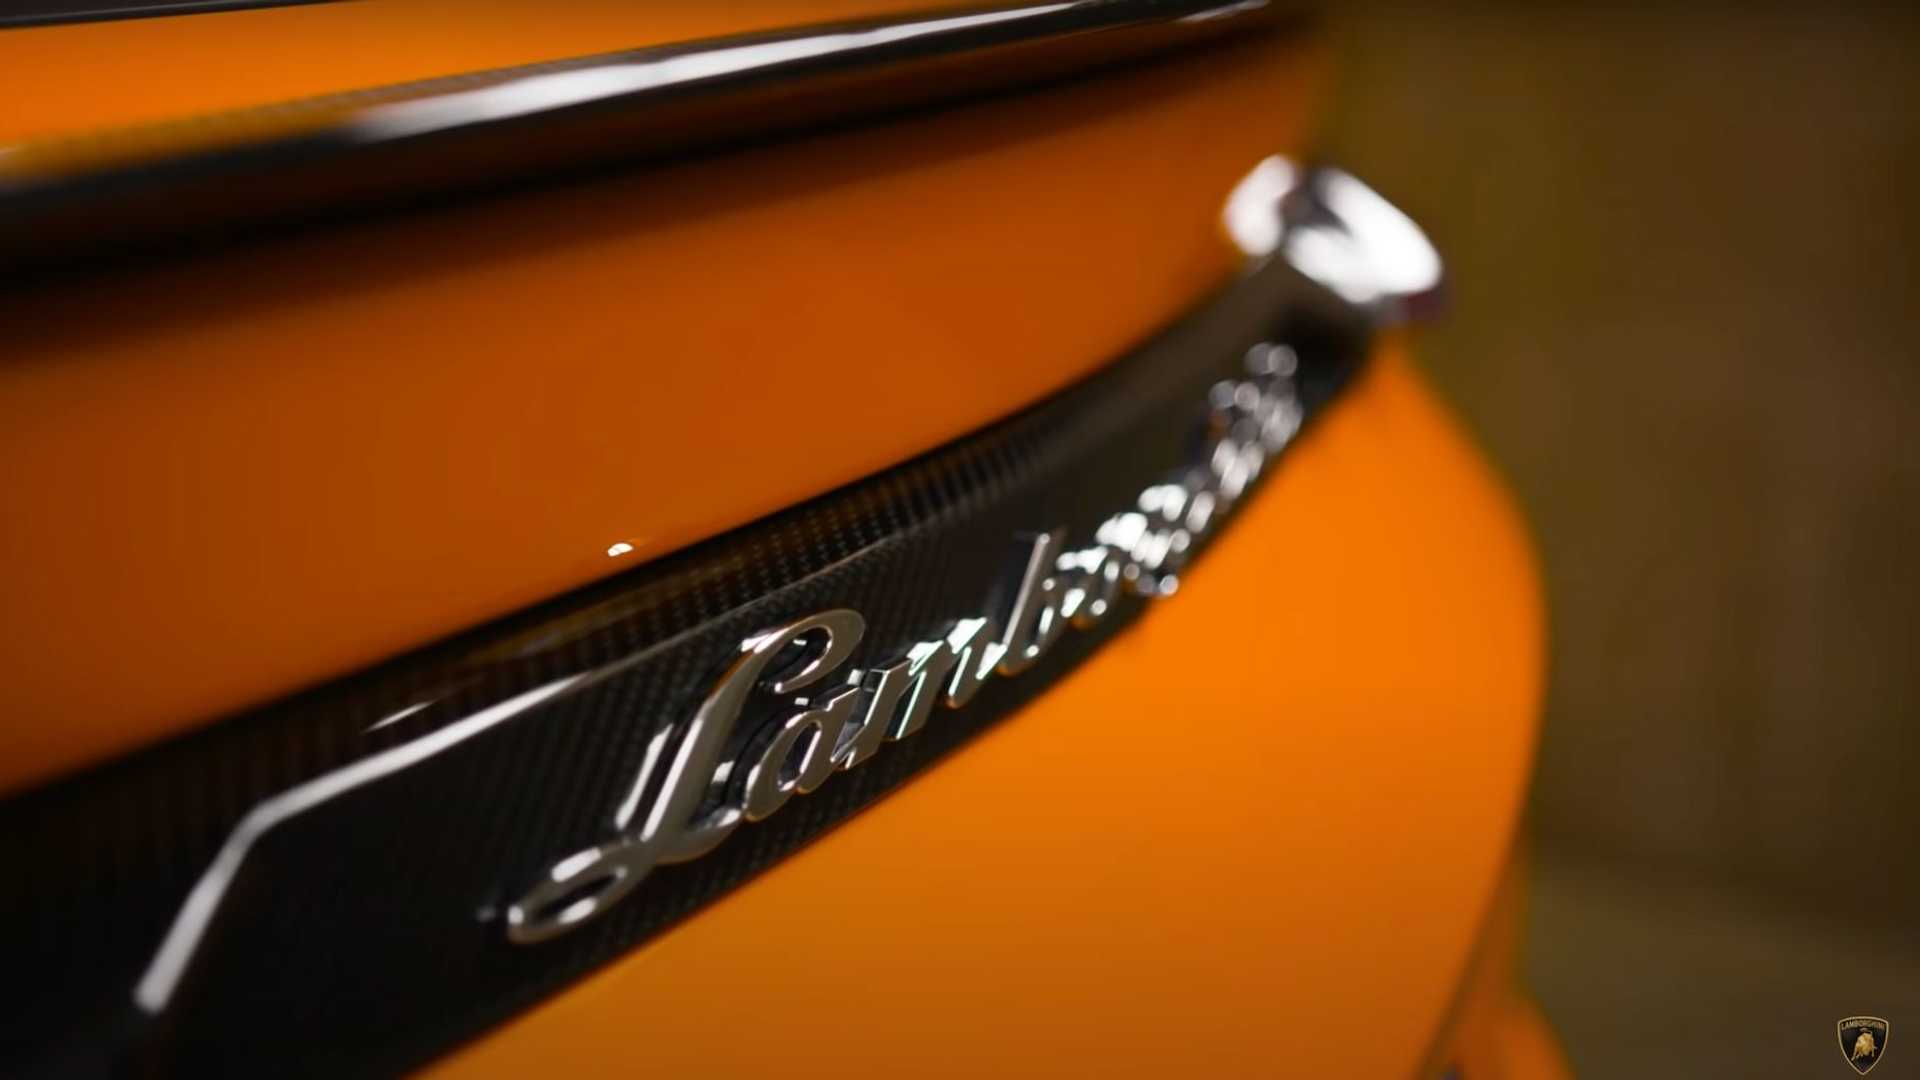

In [24]:
from IPython.display import Image, display

display(Image(filename='/fs/archive/share/mm_datasets/obelics_images/0.jpg'))